In [1]:
import gzip
import json
import csv

In [2]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [3]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        b,u,r,t = l.strip().split(',')
        r = int(r)
        yield b,u,r,t

In [4]:
allRatings = []
for l in readCSV("rating-Alaska.csv.gz"):
    allRatings.append(l)

allRatings

[('0x56b646ed2220b77f:0xd8975e316de80952',
  '109129804842686204152',
  5,
  '1566331951619'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '108233908345184666082',
  5,
  '1503373018846'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '112719098184283195565',
  5,
  '1410062370985'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '111423891190453074451',
  5,
  '1495241580499'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '113240926405758965692',
  5,
  '1504917982385'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '113044837891141253355',
  4,
  '1474765901185'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '105889967148147311402',
  5,
  '1499178889954'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '110329155147592031570',
  4,
  '1472858535682'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '108989634908602011119',
  5,
  '1529649811341'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '115962574912569482669',
  1,
  '1565638584279'),
 ('0x56b646ed2220b77f:0xd8975e316de80952',
  '1077

### JSON TO CSV

In [5]:
input_file = 'review-Alaska_10.json'
output_file = 'review-Alaska_10.csv'

with open(output_file, 'w', encoding='utf-8', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    with open(input_file, 'r', encoding='utf-8') as json_file:
        first_line = True
        for line in json_file:
            json_object = json.loads(line.strip())
            
            if first_line:
                csv_writer.writerow(json_object.keys())
                first_line = False
            
            csv_writer.writerow(json_object.values())

print(f"Data successfully converted to {output_file}")

Data successfully converted to review-Alaska_10.csv


In [6]:
input_file = 'review-Alaska_10.json'

with open(input_file, 'r', encoding='utf-8') as json_file:
    data = [json.loads(line.strip()) for line in json_file]

In [7]:
data

[{'user_id': '109129804842686204152',
  'name': 'Nicki Gore',
  'time': 1566331951619,
  'rating': 5,
  'text': 'We always stay here when in Valdez for silver salmon fishing. The elderly couple that run it are amazing to talk to, extremely helpful. The campsites are very well maintained.',
  'pics': None,
  'resp': None,
  'gmap_id': '0x56b646ed2220b77f:0xd8975e316de80952'},
 {'user_id': '113240926405758965692',
  'name': 'Allen Ratliff',
  'time': 1504917982385,
  'rating': 5,
  'text': 'Great campground for the price. Nice hot unlimited showers, laundy, and  spacious wooded lots. Full hook ups. Late check in available.',
  'pics': None,
  'resp': None,
  'gmap_id': '0x56b646ed2220b77f:0xd8975e316de80952'},
 {'user_id': '113044837891141253355',
  'name': 'Jonathan Tringali',
  'time': 1474765901185,
  'rating': 4,
  'text': "We tent camped here for 2 nights while exploring Valdez. The center of the campground was in the open and there are treed sites around the edges. Don't expect low

In [8]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn import metrics
import math

In [9]:
df = pd.read_csv('review-Alaska_10.csv')

#### Word Cloud Visualization E.g.

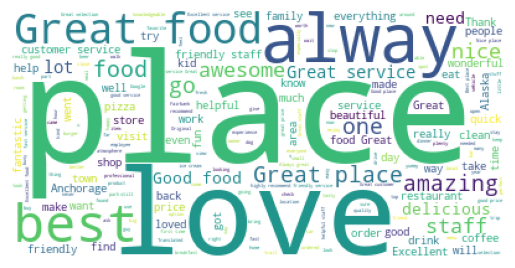

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df5 = df[(df['rating'] == 5) & (df['text'].notna())]

text5 = " ".join(df5['text'])

# Generate and display the word cloud
wordcloud5 = WordCloud(background_color="white").generate(text5)
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

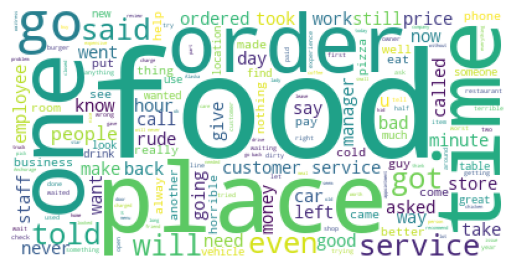

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df1 = df[(df['rating'] == 1) & (df['text'].notna())]

text1 = " ".join(df1['text'])

wordcloud1 = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [12]:
df = df[df['text'].notna()]

In [13]:
df = df.sample(frac=0.2)

In [14]:
x = df['text']
y = df['rating']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_pred = regr.predict(X_test)
ssr = np.sum(Y_pred - np.mean(Y_test)) ** 2
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
print('R^2 score: %.2f' % regr.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)

R^2 score: -0.17
RMSE: 1.18


In [16]:
df_features = pd.DataFrame(data = {'Coefficient':list(regr.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
df_features['Coefficient_Magnitude'] = abs(df_features['Coefficient'])
df_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

,Coefficient,Feature_Name,Coefficient_Magnitude
11756,-4.838714,strongly recommend,4.838714
11755,4.706648,strongly,4.706648
5795,4.214177,handful of,4.214177
5794,-4.139902,handful,4.139902
15337,3.778357,yell,3.778357
13603,-3.658907,to yell,3.658907
6056,3.507666,helpful please,3.507666
7383,3.507666,like button,3.507666
14290,-3.058847,wal mart,3.058847
14289,2.969144,wal,2.969144


### Lasso

In [17]:
alpha_list = [0.0001, 0.001, 0.01, 0.1]
col_labels_lasso = ['Alpha', 'Training RMSE', 'Model Complexity - Coef Norm1', 'Model Complexity - Coef Sum', 'Test RMSE']

result_lasso_arr = []
for alpha in alpha_list:
    result_lasso_list=[]
    #build model:
    lasso = linear_model.Lasso(alpha)
    lasso.fit(X_train, Y_train)
    #applied to test data
    Y_pred_test = lasso.predict(X_test)
    mse_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    #applied to train data
    Y_pred_train = lasso.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    #compute complexity by L1-norm of the model parameter values
    complexity_coef_norm1 = np.linalg.norm(lasso.coef_, ord=1)
    #compute complexity by sum of the model parameter magnitudes
    complexity_coef_sum = np.sum(np.abs(lasso.coef_))
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Model Complexity - Norm1 of Coefficients: {complexity_coef_norm1}')
    print(f'Model Complexity - Sum of Coefficients: {complexity_coef_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_lasso_list = [alpha, rmse_train, complexity_coef_norm1, complexity_coef_sum, rmse_test]
    result_lasso_arr.append(result_lasso_list)
    
df_lasso = pd.DataFrame(result_lasso_arr,columns=col_labels_lasso)
df_lasso

Alpha value: 0.0001
Train RMSE: 0.7405364272236079
Model Complexity - Norm1 of Coefficients: 469.11773280212594
Model Complexity - Sum of Coefficients: 469.11773280212594
Test RMSE: 0.8675390227275005

Alpha value: 0.001
Train RMSE: 0.8640549136016481
Model Complexity - Norm1 of Coefficients: 37.75125538815346
Model Complexity - Sum of Coefficients: 37.75125538815346
Test RMSE: 0.8833538082742207

Alpha value: 0.01
Train RMSE: 0.9687215605920395
Model Complexity - Norm1 of Coefficients: 4.0700465672016115
Model Complexity - Sum of Coefficients: 4.0700465672016115
Test RMSE: 0.9759447606483699

Alpha value: 0.1
Train RMSE: 1.065455181235364
Model Complexity - Norm1 of Coefficients: 0.1357717240609411
Model Complexity - Sum of Coefficients: 0.1357717240609411
Test RMSE: 1.0774441437355682



,Alpha,Training RMSE,Model Complexity - Coef Norm1,Model Complexity - Coef Sum,Test RMSE
0,0.0001,0.740536,469.117733,469.117733,0.867539
1,0.0010,0.864055,37.751255,37.751255,0.883354
2,0.0100,0.968722,4.070047,4.070047,0.975945
3,0.1000,1.065455,0.135772,0.135772,1.077444


In [18]:
lasso_best = linear_model.Lasso(0.0001)
lasso_best.fit(X_train, Y_train)
df_lasso_features = pd.DataFrame(data = {'Coefficient':list(lasso_best.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
df_lasso_features['Coefficient_Magnitude'] = abs(df_lasso_features['Coefficient'])

In [19]:
df_lasso_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(100)

,Coefficient,Feature_Name,Coefficient_Magnitude
13883,-1.462359,ugh,1.462359
11796,-1.461197,sucks,1.461197
5770,-1.039802,hair in,1.039802
5089,-1.034639,garbage,1.034639
15248,-1.028848,worst,1.028848
...,...,...,...
8623,0.499285,not disappointed,0.499285
9345,-0.496913,outdated,0.496913
432,-0.493642,always out,0.493642
3130,-0.493172,could give,0.493172


### Ridge

In [20]:
alpha_list = [0.0001, 0.001, 0.01, 0.1]
col_labels_ridge = ['Alpha', 'Training RMSE', 'Model Complexity - Coef Norm2', 'Model Complexity - Coef Sum', 'Test RMSE']

result_ridge_arr = []
for alpha in alpha_list:
    result_ridge_list=[]
    #build model:
    ridge = linear_model.Ridge(alpha)
    ridge.fit(X_train, Y_train)
    #applied to test data
    Y_pred_test = ridge.predict(X_test)
    mse_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    #applied to train data
    Y_pred_train = ridge.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    #compute complexity by L1-norm of the model parameter values
    complexity_coef_norm2 = np.linalg.norm(ridge.coef_, ord=2)
    #compute complexity by sum of the model parameter magnitude
    complexity_coef_sum = np.sum(np.abs(ridge.coef_))
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Model Complexity - Norm2 of Coefficients: {complexity_coef_norm2}')
    print(f'Model Complexity - Sum of Coefficients: {complexity_coef_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_ridge_list = [alpha, rmse_train, complexity_coef_norm2, complexity_coef_sum, rmse_test]
    result_ridge_arr.append(result_ridge_list)

df_ridge = pd.DataFrame(result_ridge_arr,columns=col_labels_ridge)
df_ridge

Alpha value: 0.0001
Train RMSE: 0.6135857201063474
Model Complexity - Norm2 of Coefficients: 50.098464392934346
Model Complexity - Sum of Coefficients: 4423.999669392935
Test RMSE: 1.1833677894491126

Alpha value: 0.001
Train RMSE: 0.6135835576636322
Model Complexity - Norm2 of Coefficients: 50.089549001696696
Model Complexity - Sum of Coefficients: 4422.444841301154
Test RMSE: 1.183216724782761

Alpha value: 0.01
Train RMSE: 0.6135912300535589
Model Complexity - Norm2 of Coefficients: 49.58142179638357
Model Complexity - Sum of Coefficients: 4395.835458082323
Test RMSE: 1.18005139960543

Alpha value: 0.1
Train RMSE: 0.6138641953024995
Model Complexity - Norm2 of Coefficients: 46.37826738020673
Model Complexity - Sum of Coefficients: 4189.086244184224
Test RMSE: 1.1559925035881264



,Alpha,Training RMSE,Model Complexity - Coef Norm2,Model Complexity - Coef Sum,Test RMSE
0,0.0001,0.613586,50.098464,4423.999669,1.183368
1,0.0010,0.613584,50.089549,4422.444841,1.183217
2,0.0100,0.613591,49.581422,4395.835458,1.180051
3,0.1000,0.613864,46.378267,4189.086244,1.155993


In [ ]:
ridge_best = linear_model.Ridge(0.1)
ridge_best.fit(X_train, Y_train)
df_ridge_features = pd.DataFrame(data = {'Coefficient':list(ridge_best.coef_),'Feature_Name':vectorizer.get_feature_names_out()})
df_ridge_features['Coefficient_Magnitude'] = abs(df_ridge_features['Coefficient'])
df_ridge_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

### Regularized Logistic Regression

In [ ]:
df_1_and_5 = df[(df.rating == 5) | (df.rating == 1)]

x = df_1_and_5['text']
y = df_1_and_5['rating']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

#### L2

In [ ]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100] 
col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']

result_log_L2_arr = []
result_fpr_L2_arr = []
result_tpr_L2_arr = []
for c_value in C_list:
    result_log_L2_list = []
    
    # Build the logistic regression estimator with the specified C value
    estimator_L2 = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=c_value,penalty='l2') 
    estimator_L2.fit(X_train, Y_train)
    # Check the class order, make sure 5 is on the 2nd column
    print('Class order:',estimator_L2.classes_)
    if estimator_L2.classes_[1] == 5:
        print('Correct positive class selection')
    else:
        print('Incorrect positive class selection, check')
    
    # Calculate AUC_train by applying the estimator on X_train
    Y_train_pred_prob = estimator_L2.predict_proba(X_train)
    Y_train_pred_prob_5star = Y_train_pred_prob[:, 1]
    AUC_train = metrics.roc_auc_score(Y_train, Y_train_pred_prob_5star)
    
    # Calculate AUC_test by applying the estimator on X_test
    Y_test_pred_prob = estimator_L2.predict_proba(X_test)
    Y_test_pred_prob_5star = Y_test_pred_prob[:, 1]
    AUC_test = metrics.roc_auc_score(Y_test, Y_test_pred_prob_5star)
    
    # Calculate fpr and tpr from test data
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_prob_5star, pos_label=5)
    
    # Compute complexity by sum of the model parameter magnitudes
    complexity_coef_sum = np.sum(np.abs(estimator_L2.coef_))
    
    # Compile results
    result_log_L2_list = [c_value, AUC_train, complexity_coef_sum, AUC_test]
    result_log_L2_arr.append(result_log_L2_list)
    result_fpr_L2_arr.append(list(fpr))
    result_tpr_L2_arr.append(list(tpr))
    
    print('C value:',c_value)
    print('Model Complexity:',complexity_coef_sum)
    print('Train_AUC:', AUC_train)
    print('Test_AUC:', AUC_test,'\n')

df_log_L2 = pd.DataFrame(result_log_L2_arr,columns=col_labels)
df_log_L2

In [ ]:
colours=['r','g','b','k','m','c']
plt.figure(figsize = (8, 8))
for i in range(len(result_fpr_L2_arr)):
    plt.plot(result_fpr_L2_arr[i],result_tpr_L2_arr[i],colours[i])
plt.gca().legend(df_log_L2['Test AUC'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
estimator_L2_best = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=0.01,penalty='l2') 
estimator_L2_best.fit(X_train, Y_train)

df_L2_features = pd.DataFrame(data = {'Coefficient':estimator_L2_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names_out()})
df_L2_features['Coefficient_Magnitude'] = abs(df_L2_features['Coefficient'])
df_L2_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

#### L1

In [ ]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100] 
col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']

result_log_L1_arr = []
result_fpr_L1_arr = []
result_tpr_L1_arr = []
for c_value in C_list:
    result_log_L1_list = []
    
    # Build the logistic regression estimator with the specified C value
    estimator_L1 = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=c_value,penalty='l1') 
    estimator_L1.fit(X_train, Y_train)
    # Check the class order, make sure 5 is on the 2nd column
    print('Class order:',estimator_L1.classes_)
    if estimator_L1.classes_[1] == 5:
        print('Correct positive class selection')
    else:
        print('Incorrect positive class selection, check')
    
    # Calculate AUC_train by applying the estimator on X_train
    Y_train_pred_prob = estimator_L1.predict_proba(X_train)
    Y_train_pred_prob_5star = Y_train_pred_prob[:, 1]
    AUC_train = metrics.roc_auc_score(Y_train, Y_train_pred_prob_5star)
    
    # Calculate AUC_test by applying the estimator on X_test
    Y_test_pred_prob = estimator_L1.predict_proba(X_test)
    Y_test_pred_prob_5star = Y_test_pred_prob[:, 1]
    AUC_test = metrics.roc_auc_score(Y_test, Y_test_pred_prob_5star)
    
    # Calculate fpr and tpr from test data
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_prob_5star, pos_label=5)
    
    # Compute complexity by sum of the model coefficients' magnitude
    complexity_coef_sum = np.sum(np.abs(estimator_L1.coef_))
    
    # Compile results
    result_log_L1_list = [c_value, AUC_train, complexity_coef_sum, AUC_test]
    result_log_L1_arr.append(result_log_L1_list)
    result_fpr_L1_arr.append(list(fpr))
    result_tpr_L1_arr.append(list(tpr))
    
    print('C value:',c_value)
    print('Model Complexity:',complexity_coef_sum)
    print('Train_AUC:', AUC_train)
    print('Test_AUC:', AUC_test,'\n')
    
df_log_L1 = pd.DataFrame(result_log_L1_arr,columns=col_labels)
df_log_L1

In [ ]:
estimator_L1_best = linear_model.LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=0.1,penalty='l1') 
estimator_L1_best.fit(X_train, Y_train)

# Obtain the features and their magnitude, then sorted by magnitide
df_L1_features = pd.DataFrame(data = {'Coefficient':estimator_L1_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names_out()})
df_L1_features['Coefficient_Magnitude'] = abs(df_L1_features['Coefficient'])
df_L1_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)